In [1]:
import pandas as pd
import numpy as np
import plotly
from plotly import __version__#
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn import svm
    

/Users/shanraja/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [2]:
train_df = pd.read_csv('train.csv')
features_df = pd.read_csv('features.csv')
store_df = pd.read_csv('stores.csv')
features_df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)

In [3]:
features_df['CPI'].fillna(features_df['CPI'].mean(),inplace=True)
features_df['Unemployment'].fillna(features_df['Unemployment'].mean(),inplace=True)

In [4]:
train_x=pd.DataFrame()
train_x=store_df.merge(train_df,on='Store')
train_x=train_x.merge(features_df,on=['Date','Store','IsHoliday'])


train_x['year'] = [int(x[0:4]) for x in list(train_x['Date'])]
train_x['month'] = [int(x[5:7]) for x in list(train_x['Date'])]
train_x['day'] = [int(x[8:]) for x in list(train_x['Date'])]
train_x.drop(['Date'],axis=1,inplace=True)

In [5]:
train_x['Type'].replace(['A','B','C'],[0,1,2],inplace=True)

In [7]:
train_x.head()
features=pd.DataFrame()
label=pd.DataFrame()
label=train_x['Weekly_Sales']

features=train_x.drop(['Weekly_Sales','Store','Type','Weekly_Sales','IsHoliday'],axis=1)

In [8]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [9]:
lm = LinearRegression()
lm.fit(X_train,y_train)
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [  9.00791093e-02   1.10943792e+02   1.73912980e+01   1.25372191e+01
  -1.69388131e+01  -2.77690959e+02  -2.33090695e+02   1.57729479e+02
  -1.85281140e+01]


Mean Square Error: 479973805.867


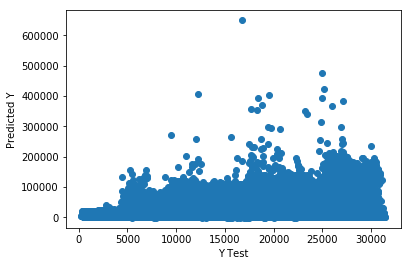

In [10]:
predictions = lm.predict( X_test)
plt.scatter(predictions,y_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
mse = metrics.mean_squared_error(y_test, predictions)
print('Mean Square Error: {:.3f}'.format(mse))

Root Mean Square Error: 4285.419


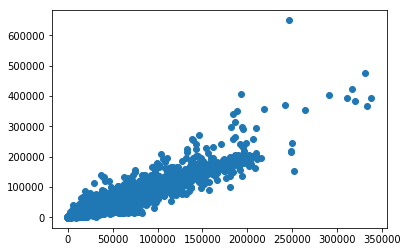

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
clf = ExtraTreesRegressor(n_estimators=200,max_features='auto')
clf.fit(X_train,y_train)
predict = clf.predict(X_test)
plt.scatter(predict,y_test)
mse = metrics.mean_squared_error(y_test, predict)
print('Root Mean Square Error: {:.3f}'.format(np.sqrt(mse)))

In [11]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,predict))
print('MSE',metrics.mean_squared_error(y_test,predict))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predict)))
print('variance score',metrics.explained_variance_score(y_test,predict))

MAE 1594.86467906
MSE 18344016.8385
RMSE 4282.99157581
variance score 0.964968575853


In [12]:
test_df = pd.read_csv('test.csv')

In [13]:
test_df=test_df.merge(store_df,on=['Store'])
test_df.drop(['Type'],axis=1,inplace=True)
test_dat=test_df.drop(['Dept','Date','IsHoliday','Store'],axis=1)

In [14]:
test_df=test_df.merge(features_df,on=['Date','Store','IsHoliday'])
test_df['year'] = [int(x[0:4]) for x in list(test_df['Date'])]
test_df['month'] = [int(x[5:7]) for x in list(test_df['Date'])]
test_df['day'] = [int(x[8:]) for x in list(test_df['Date'])]
test_df.drop(['Date'],axis=1,inplace=True)

In [15]:
# Making of the new dataframe to fit
test_fit=pd.DataFrame()
test_fit['Size']=test_dat['Size']
test_fit['Dept']=test_df['Dept']
test_fit['Temperature']=test_df['Temperature']
test_fit['Fuel_Price']=test_df['Fuel_Price']
test_fit['CPI']=test_df['CPI']
test_fit['Unemployment']=test_df['Unemployment']
test_fit['year']=test_df['year']
test_fit['month']=test_df['month']
test_fit['day']=test_df['day']
test_fit['IsHoliday']=test_df['IsHoliday']
test_fit['Store']=test_df['Store']





In [16]:

test_fit=test_fit.drop(['IsHoliday'],axis=1)



In [17]:
def Reg_test(func_df,test_pred):
    features=pd.DataFrame()
    label=pd.DataFrame()
    label=func_df['Weekly_Sales']
    features=func_df.drop(['Weekly_Sales','Store','Type','Weekly_Sales','IsHoliday'],axis=1)
    test_pred=test_pred.drop(['Store'],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.1, random_state=101)
    
    #Extra Tree Regressor
    print('************ Extra Tree Regression************')
    clf = ExtraTreesRegressor(n_estimators=200,max_features='auto')
    clf.fit(X_train,y_train)
    predict = clf.predict(test_pred)
    return predict
    
    


In [18]:
result=Reg_test(train_x,test_fit)


************ Extra Tree Regression************


In [19]:
result_df=pd.DataFrame()
result_df=test_fit
result_df['Weekly_Sales']=result

In [20]:
final_df=pd.DataFrame()
final_df=result_df
final_df.to_csv('final_result_WC.csv')

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test.astype(int),predict.astype(int))

0.0016051110531268037